In [1]:
from fastai.vision import *

In [2]:
folders=  ['gem', 'custom_24', '335', 'jazzmaster', 'telecaster', 'stratocaster', 'sg', 'les_paul']
files = ['urls_gem.txt', 'urls_custom_24.txt', 'urls_335.txt', 'urls_jazzmaster.txt', 'urls_telecaster.txt', 'urls_stratocaster.txt', 'urls_sg.txt', 'urls_les_paul.txt']

In [ ]:
i = 0

while i < len(folders):
    path = Path('data1/guitars')
    dest = path/folders[i]
    dest.mkdir(parents=True, exist_ok=True)
    
    download_images(path/files[i], dest, max_pics=200)
    
    i += 1

In [3]:
classes = folders

path = Path('guitar_data/guitars')

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

gem


custom_24


335


jazzmaster


telecaster


stratocaster


sg


les_paul


In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

data.classes

['335',
 'custom_24',
 'gem',
 'jazzmaster',
 'les_paul',
 'sg',
 'stratocaster',
 'telecaster']

In [42]:
# If you already cleaned your data, run this cell instead of the one before
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.05, csv_labels='cleaned.csv',
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

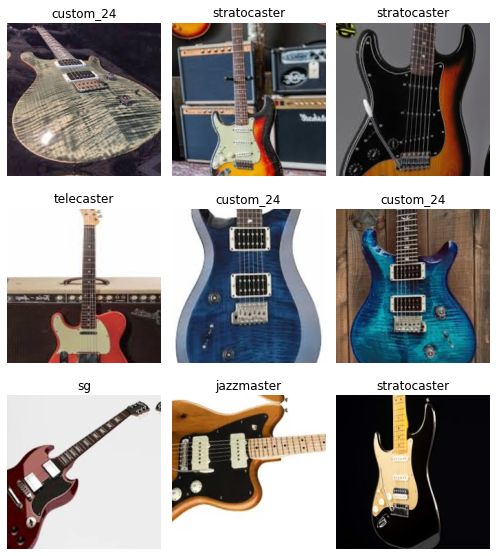

In [43]:
data.show_batch(rows=3, figsize=(7,8))

In [44]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['335',
  'custom_24',
  'gem',
  'jazzmaster',
  'les_paul',
  'sg',
  'stratocaster',
  'telecaster'],
 8,
 1104,
 58)

In [46]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

learn.fit_one_cycle(6)

In [47]:
learn.save('stage-1')

In [48]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


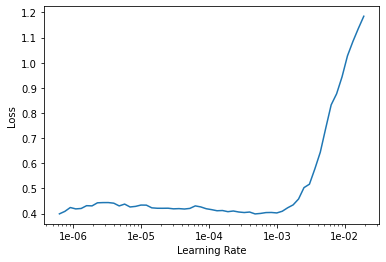

In [49]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


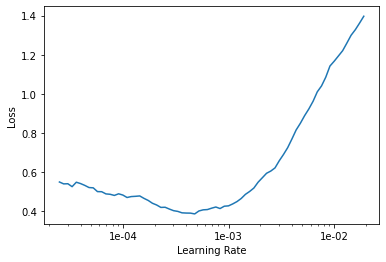

In [31]:
# If the plot is not showing try to give a start and end learning rate
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(3, max_lr=slice(3e-5,3e-3))

In [51]:
learn.save('stage-2')

In [52]:
learn.load('stage-2');

In [53]:
interp = ClassificationInterpretation.from_learner(learn)

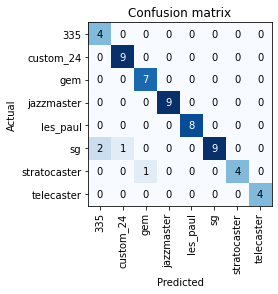

In [54]:
interp.plot_confusion_matrix()

In [37]:
from fastai.widgets import *

In [38]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [39]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [40]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [41]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Export Model

In [61]:
learn.export()

## Test the model

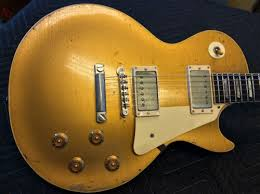

In [82]:
defaults.device = torch.device('cpu')

img = open_image(path/'les_paul'/'00000087.jpg')
img

In [83]:
learn = load_learner(path)

In [84]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'les_paul'